<a href="https://colab.research.google.com/github/HirunaD/EE6350---Artificial-Intelligence/blob/main/2_LSTM_Time_Sequence_Prediction_Student_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the necessaty packages
import numpy as np
import pandas as pd
import math
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch

# Declare the independent variable x
x = torch.linspace(0, 799, steps=800)

# Print the declared independent variable x
print(x)


tensor([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
         36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
         48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
         60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
         72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
         84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
         96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
        108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
        120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
        144., 145., 146., 147., 148., 14

In [3]:
# Print the first 10 values of the independent variable x
print(x[:10])


tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])


In [4]:
# Print the last 10 values of the independent variable x
print(x[-10:])

tensor([790., 791., 792., 793., 794., 795., 796., 797., 798., 799.])


In [5]:
# Creat the dependent variable, y as sign values
y = torch.sin(x * 2*math.pi/40)

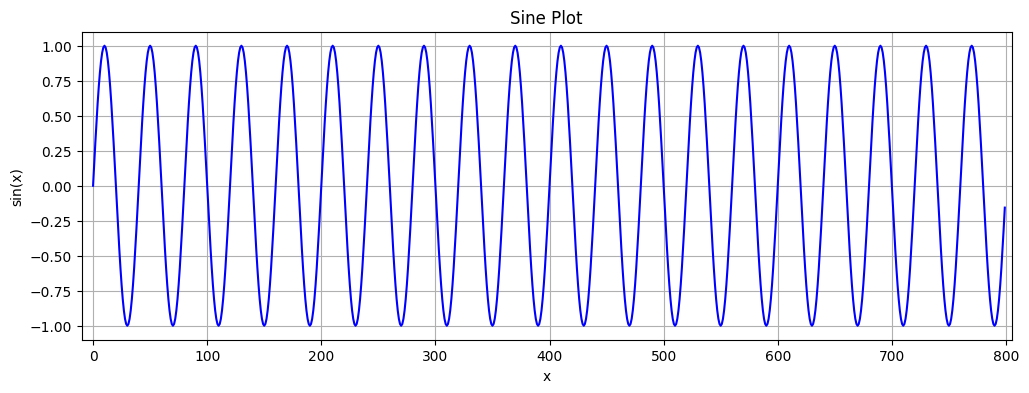

In [6]:
# Plot y against x
plt.figure(figsize=(12, 4))
plt.xlim(-10, 805)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Sine Plot")
plt.plot(y.numpy(), color = 'b')
plt.show()

In [7]:
# Split the data into train/test set
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

In [8]:
# Print Length of the train set
len(train_set)

760

In [9]:
# Print Length of the test set
len(test_set)

40

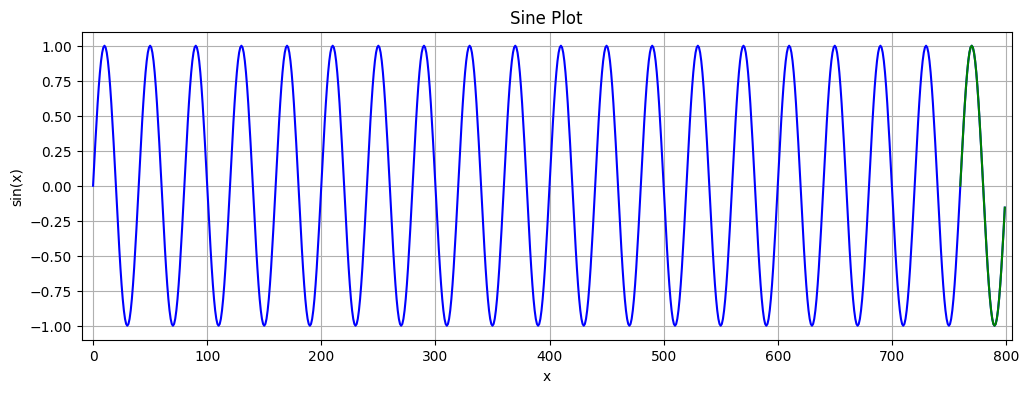

In [11]:
# Plot the training and testing sets
plt.figure(figsize=(12, 4))
plt.xlim(-10, 805)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Sine Plot")
plt.plot(y.numpy(), color = 'b')
plt.plot(range(760, 800), test_set.numpy(), color = 'g')
plt.show()

In [12]:
# Create function to batch data

def input_data(seq, ws):
  out = []
  L = len(seq)

  for i in range(L-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    out.append((window, label))

  return out

In [13]:
# Split data into batches (using the above function)
window_size = 40
train_data = input_data(train_set, window_size)

In [14]:
# Length of the train data
len(train_data)

720

In [15]:
# Print the first batch
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9101e-01,  8.0902e-01,
          7.0711e-01,  5.8779e-01,  4.5399e-01,  3.0902e-01,  1.5643e-01,
         -8.7423e-08, -1.5643e-01, -3.0902e-01, -4.5399e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5106e-01, -8.9101e-01, -8.0902e-01,
         -7.0711e-01, -5.8779e-01, -4.5399e-01, -3.0902e-01, -1.5643e-01]),
 tensor([1.7485e-07]))

In [17]:
# Define the LSTM class
# class LSTM(nn.Module):
#   def __init__(input_size = 1, hidden_size = 50, out_size = 1)
#   super().__init__()
#   self.hidden_size = hidden_size
#   self.lstm = nn.LSTM(input_size, hidden_size)
#   self.linear = nn.Linear(hidden_size, out_size)
#   self.hidden = (torch.zores(1, 1, hidden_size), (torch.zeros(1, 1, hidden_size)))

#   def forward(self, seq):
#     lstm_out, self_hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
#     pred = self.linear(lstm_out.view(len(seq), -1))
#     return pred[-1]

import torch
import torch.nn as nn

# Define the LSTM class
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1):  # Add missing colon and fix torch.zeros
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, out_size)
        self.hidden = (torch.zeros(1, 1, hidden_size), torch.zeros(1, 1, hidden_size))  # Fix torch.zeros

    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq), -1))
        return pred[-1]


In [ ]:
# Instantiate tge model
torch.manual_send(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer =